### Imports

In [10]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Softmax
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import pandas 

### Data Preparation

In [11]:
data = pandas.read_csv('./data/Learning/Training_set_new.csv')
test = pandas.read_csv('./data/Learning/Test_set.csv')
gtTrain = pandas.read_csv('./data/21/groundTruthEdited.csv')
gtTest = pandas.read_csv('./data/17/groundTruthEdited.csv')

x_train_set = data[['x','y','z']]

target = data['brakingStatus']
# xtrain_set = [data[['x','y','z']][i:i+1].iterrows() for i in range(0,train_set)]
# target = [data['brakingStatus'][i:i+1] for i in range(0,train_set)]

x_test_set = test[['x','y','z']]
y_test_set = test['brakingStatus']


In [12]:
x_train_set = np.array(x_train_set,dtype=float)

target = np.array(target,dtype=float)

x_test_set =  np.array(x_test_set,dtype=float)
y_test_set =  np.array(y_test_set,dtype=float)

In [13]:
x_train_set_array= []
for i in x_train_set:
    x_train_set_array.append([i])
x_train_set_array = np.array(x_train_set_array, dtype = float)

x_test_set_array= []      
for i in x_test_set:
    x_test_set_array.append([i])
x_test_set_array = np.array(x_test_set_array, dtype = float)

y_test_set_array= []      
for i in y_test_set:
    y_test_set_array.append([i])
y_test_set_array = np.array(y_test_set_array, dtype = float)

target_array= []      
for i in target:
    target_array.append([i])
target_array = np.array(target_array, dtype = float)




In [61]:
# target_array.shape
# x_train_set_array.shape
#x_train_set_array.
# np.squeeze(x_train_set_array, axis = 1).shape
x_train_set_array_reshape = np.squeeze(x_train_set_array, axis = 1)
target_array_reshape = np.squeeze(target_array, axis = 1)


In [84]:
x_test_set_array.shape

(20675, 1, 3)

In [205]:
gtTrain

,evento,startIndexinAcc,endIndexinAcc
0,evento_nao_agressivo,1751,1954
1,troca_faixa_esquerda_agressiva,1140,1241
2,evento_nao_agressivo,4298,4552
3,troca_faixa_esquerda_agressiva,4909,5112
4,troca_faixa_esquerda_agressiva,5470,5622
5,evento_nao_agressivo,5928,6182
6,troca_faixa_esquerda_agressiva,8271,8423
7,evento_nao_agressivo,9595,9849
8,freada_agressiva,10105,10256
9,freada_agressiva,13059,13261


### RNN model

In [76]:
model = Sequential()

In [77]:
model.add(LSTM(1,batch_input_shape= (None,10,3),return_sequences= False))

In [78]:
model.add(Softmax())

In [79]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [80]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (None, 1)                 20        
_________________________________________________________________
softmax_8 (Softmax)          (None, 1)                 0         
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


In [85]:
# history = model.fit(
#     np.array([x_train_set_array_reshape[i:i+10] for i in range(5000,15000)]),
#     np.array([target_array_reshape[i:i+10] for i in range(5000,15000)]),
#     epochs=100,
#     validation_data=(np.array([x_train_set_array_reshape[i:i+10] for i in range(18500,20000)]),np.array([target_array_reshape[i:i+10] for i in range(18500,20000)])),
#     batch_size=128)
history = model.fit(
    x_train_set_array[5000:5010],target_array[5000:5010],epochs=100,
    validation_data=(x_train_set_array[18500:20000],target_array[18500:20000]),
    batch_size=128)

ValueError: Error when checking input: expected lstm_7_input to have shape (10, 3) but got array with shape (1, 3)

In [56]:
[x_train_set_array[i:i+10] for i in range(1,100)]

[array([[[ 2.02217755, -0.12587721,  0.14135243]],
 
        [[ 0.77763394, -0.08864197,  2.00268872]],
 
        [[-0.69554217, -0.12786201, -1.13422993]],
 
        [[-1.86422014,  0.84331071, -1.78310265]],
 
        [[-0.25028119,  0.02468984, -0.30771547]],
 
        [[ 0.98519874, -0.53148717,  0.98553079]],
 
        [[ 0.25053499, -0.31494175, -0.2151497 ]],
 
        [[-1.30261753,  0.58909205, -1.11933019]],
 
        [[-0.75789308,  0.37743167, -0.48275053]],
 
        [[ 0.40023665, -0.46864504,  0.71053093]]]),
 array([[[ 0.77763394, -0.08864197,  2.00268872]],
 
        [[-0.69554217, -0.12786201, -1.13422993]],
 
        [[-1.86422014,  0.84331071, -1.78310265]],
 
        [[-0.25028119,  0.02468984, -0.30771547]],
 
        [[ 0.98519874, -0.53148717,  0.98553079]],
 
        [[ 0.25053499, -0.31494175, -0.2151497 ]],
 
        [[-1.30261753,  0.58909205, -1.11933019]],
 
        [[-0.75789308,  0.37743167, -0.48275053]],
 
        [[ 0.40023665, -0.46864504,  0.7105309

In [210]:
results = model.predict(x_test_set_array)

In [211]:
# results[11198:11349]
len(results)

20675

<function matplotlib.pyplot.show(*args, **kw)>

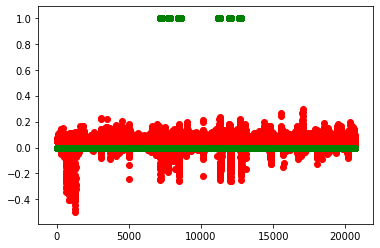

In [212]:
plt.scatter(range(20675),results,c='r')
plt.scatter(range(20675),y_test_set_array,c='g')
plt.show

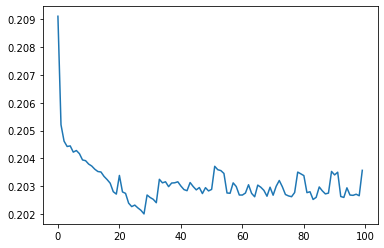

In [213]:
plt.plot(history.history['loss'])
plt.show()

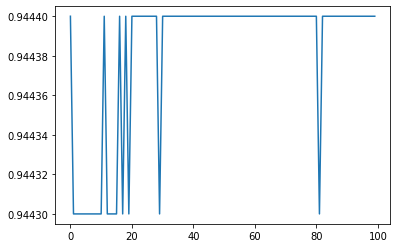

In [214]:
plt.plot(history.history['acc'])
plt.show()

### Training by just 'X' 

In [44]:
x_train_set_X = data['x']
x_test_set_X = test['x']


x_train_set_X = np.array(x_train_set_X,dtype= float)
x_test_set_X = np.array(x_test_set_X,dtype= float)


In [45]:
x_train_set_array_X= []      
for i in x_train_set:
    x_train_set_array_X.append([i])
x_train_set_array_X = np.array(x_train_set_array_X, dtype = float)

x_test_set_array_X= []      
for i in x_test_set:
    x_test_set_array_X.append([i])
x_test_set_array_X = np.array(x_test_set_array_X, dtype = float)

In [46]:
model_X = Sequential()

In [47]:
model_X.add(LSTM(1,batch_input_shape= (None,1,3),return_sequences= False))

In [49]:
model_X.compile(loss='mean_absolute_error',optimizer='adam',metrics=['accuracy'])

In [50]:
model_X.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 1)                 20        
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________
